In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from tqdm import tqdm

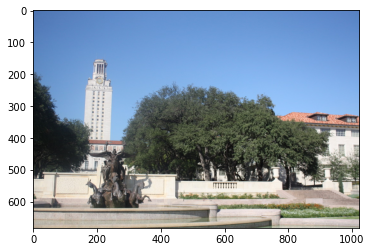

In [2]:
# address1 = 'imagesSet2/1.jpg'
address1 = 'uttower_left.jpg'
image1 = cv.imread(address1)
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
gray1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
plt.imshow(image1)

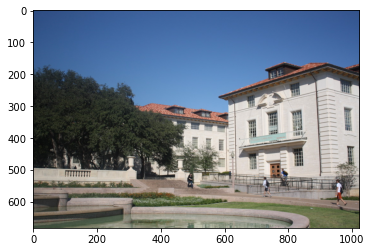

In [3]:
# address2 = 'imagesSet2/2.jpg'
address2 = 'uttower_right.jpg'
image2 = cv.imread(address2)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
plt.imshow(image2)

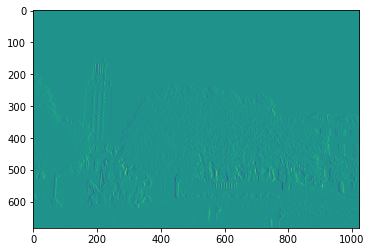

In [4]:
Ix = cv.Sobel(gray1, cv.CV_32F, 1, 0, ksize=3)
plt.imshow(Ix)

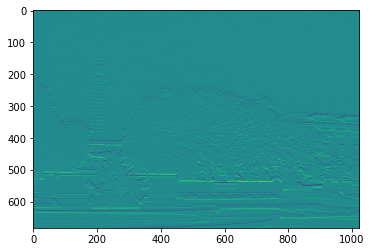

In [5]:
Iy = cv.Sobel(gray1, cv.CV_32F, 0, 1, ksize=3)
plt.imshow(Iy)

In [6]:
Ix2 = Ix*Ix
IxIy = Ix*Iy
Iy2 = Iy*Iy
print(np.min(Ix2), np.max(Ix2))
print(np.min(IxIy), np.max(IxIy))
print(np.min(Iy2), np.max(Iy2))
# print(Ix2)

0.0 893025.0
-343824.0 259875.0
0.0 748225.0


In [7]:
shape = np.shape(image1)
k1 = 3
k2 = 3
i = j = 0
m = n = 1

M = np.zeros((2, 2))
out1 = np.zeros(np.shape(Ix))

while(i + k1 <= shape[0]):
    while(j + k2 <= shape[1]):
        M[0][0] = np.sum(Ix2[i:i+k1, j:j+k2])
        M[1][0] = M[0][1] = np.sum(IxIy[i:i+k1, j:j+k2])
        # M[1][0] = np.sum(IxIy[i:i+k1, j:j+k2])
        M[1][1] = np.sum(Iy2[i:i+k1, j:j+k2])
        out1[m][n] = np.linalg.det(M) - 0.06*(np.trace(M)**2)
        # print(M)
        j += 1
        n += 1
        # break
    i += 1
    m += 1
    j = 0
    n = 0
    # break
# print(M)

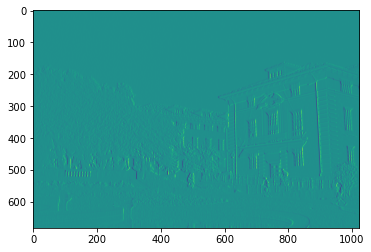

In [8]:
Ix = cv.Sobel(gray2, cv.CV_32F, 1, 0, ksize=3)
plt.imshow(Ix)

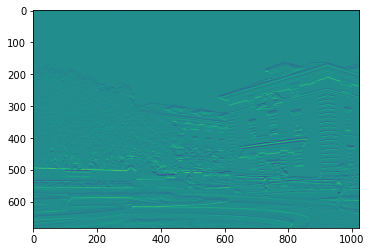

In [9]:
Iy = cv.Sobel(gray2, cv.CV_32F, 0, 1, ksize=3)
plt.imshow(Iy)

In [10]:
Ix2 = Ix*Ix
IxIy = Ix*Iy
Iy2 = Iy*Iy
print(np.min(Ix2), np.max(Ix2))
print(np.min(IxIy), np.max(IxIy))
print(np.min(Iy2), np.max(Iy2))

0.0 616225.0
-254748.0 248880.0
0.0 586756.0


In [11]:
shape = np.shape(image2)
k1 = 3
k2 = 3
i = j = 0
m = n = 1

M = np.zeros((2, 2))
out2 = np.zeros(np.shape(Ix))

while(i + k1 <= shape[0]):
    while(j + k2 <= shape[1]):
        # output[m][n] = np.sum(channel[i:i+k1, j:j+k2] * kernel)
        M[0][0] = np.sum(Ix2[i:i+k1, j:j+k2])
        M[1][0] = M[0][1] = np.sum(IxIy[i:i+k1, j:j+k2])
        # M[1][0] = np.sum(IxIy[i:i+k1, j:j+k2])
        M[1][1] = np.sum(Iy2[i:i+k1, j:j+k2])
        out2[m][n] = np.linalg.det(M) - 0.06*(np.trace(M)**2)
        # print(M)
        j += 1
        n += 1
        # print(i, j)
        # break
    i += 1
    m += 1
    j = 0
    n = 0
    # break
# print(M)

In [12]:
print(np.max(out1), np.max(out2))

1652896769215.44 1247734201875.7551


In [13]:
print(np.shape(out1), np.shape(image1))
print(np.shape(out2), np.shape(image2))


(683, 1024) (683, 1024, 3)
(683, 1024) (683, 1024, 3)


In [14]:
lst1 = []
lst2 = []

colIm1 = np.copy(image1)
colIm2 = np.copy(image2)

for i in tqdm(range(np.shape(out1)[0])):
  for j in range(np.shape(out1)[1]):
    if out1[i][j] > 50000000000:
      cv.circle(colIm1, (j, i), 3, (0, 0, 255), -1)
      kp = cv.KeyPoint(j, i, 5, _class_id=0)
      lst1.append(kp)
    # else:
    #   cv.circle(image1, (i, j), 3, (255, 0, 0), -1)
    # print(i)
    # break

for i in tqdm(range(np.shape(out2)[0])):
  for j in range(np.shape(out2)[1]):
    if out2[i][j] > 50000000000:
      cv.circle(colIm2, (j, i), 3, (0, 0, 255), -1)
      kp = cv.KeyPoint(j, i, 5, _class_id=0)
      lst2.append(kp)

100%|██████████| 683/683 [00:00<00:00, 1477.55it/s]


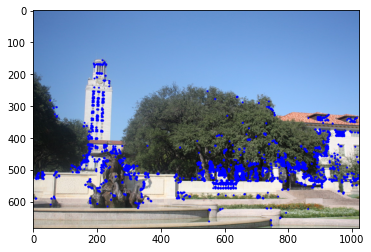

In [15]:
plt.imshow(colIm1)

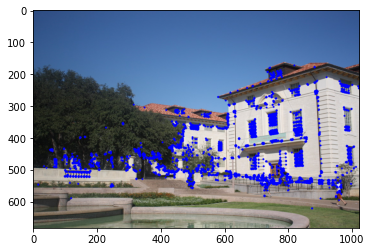

In [16]:
plt.imshow(colIm2)

In [17]:
im1 = cv.drawKeypoints(gray1, lst1, None)

In [18]:
im2 = cv.drawKeypoints(gray2, lst2, None)

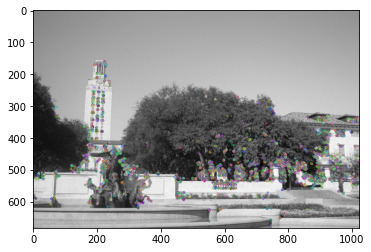

In [19]:
plt.imshow(im1)

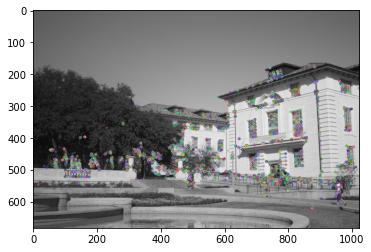

In [20]:
plt.imshow(im2)

In [21]:
sift = cv.BRISK_create()


kp1, desc1 = sift.compute(gray1, lst1)
kp2, desc2 = sift.compute(gray2, lst2)

kp21, desc21 = sift.detectAndCompute(gray1, None)
kp22, desc22 = sift.detectAndCompute(gray2, None)

print(type(kp21), type(kp1))

<class 'list'> <class 'list'>


In [99]:
sift = cv.xfeatures2d.SIFT_create()


kp1, desc1 = sift.compute(gray1, lst1)
kp2, desc2 = sift.compute(gray2, lst2)

In [57]:
bf = cv.BFMatcher()
matches = bf.knnMatch(desc1,desc2, k=4)

In [22]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches2 = bf.match(desc1,desc2)
matches2 = sorted(matches2, key = lambda x:x.distance)

In [23]:
print(len(matches2))

1912


In [24]:
img3 = cv.drawMatches(image1, kp1, image2, kp2, matches2[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

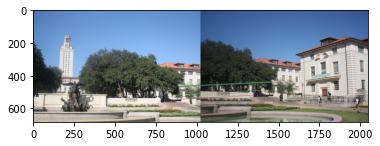

In [25]:
plt.imshow(img3)

In [26]:
image_1_points = np.zeros((len(matches2), 1, 2), dtype=np.float32)
image_2_points = np.zeros((len(matches2), 1, 2), dtype=np.float32)

for i in range(0,len(matches2)):
    image_1_points[i] = kp1[matches2[i].queryIdx].pt
    image_2_points[i] = kp2[matches2[i].trainIdx].pt

(H, status) = cv.findHomography(image_2_points, image_1_points, cv.RANSAC, 4)
print(H)

[[ 7.85850247e-01  6.14857282e-02  4.39555125e+02]
 [-1.33749787e-01  9.41268061e-01  6.92322893e+01]
 [-2.07342181e-04 -3.39303117e-06  1.00000000e+00]]


In [112]:
# H = [[ 0.818615992,  0.113260526,  427.375823],
#  [-0.129788373,  0.997128543,  56.5078169],
#  [-0.000201547,  0.0000543423,  1.00000000]]
# H = np.array(H)


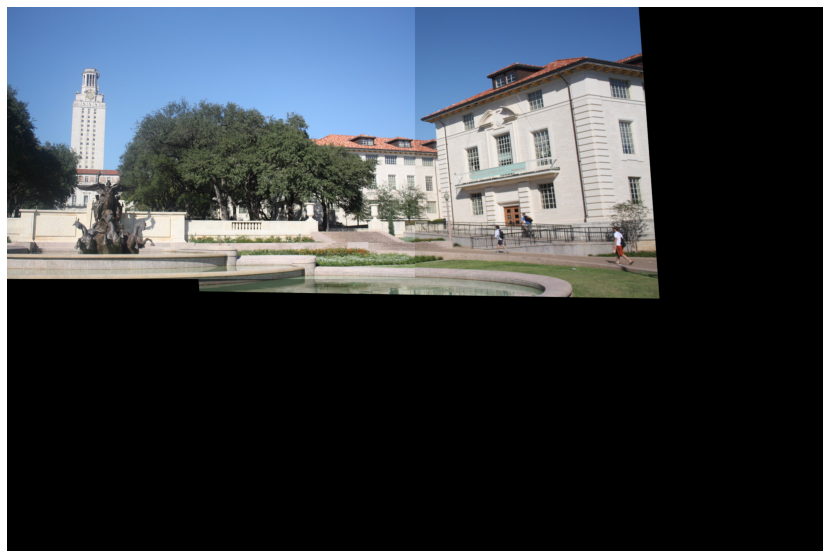

In [29]:
width = image2.shape[1] + image1.shape[1]
height = image2.shape[0] + image1.shape[0]

result = cv.warpPerspective(image2, H, (width, height))

result[0:image1.shape[0], 0:image1.shape[1]] = image1

plt.figure(figsize=(20,10))
plt.imshow(result)
plt.axis('off')
plt.show()